<a href="https://colab.research.google.com/github/StillWork/ds-lab/blob/master/gg_52_cats_and_dogs_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification of Cats and Dogs

- 직접 만든 모델로 처음부터 학습을 시킨다. 
- 원래 데이터는 25,000개 (고양이 + 강아지)
- 여기서는 2000개로 학습을 시킨다
- 검증은 1000개의 이미지 사용 

### 데이터 다운로드

In [1]:
import os, os.path, shutil
# import zipfile
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
!curl -L \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 40 65.4M   40 26.3M    0     0  21.5M      0  0:00:03  0:00:01  0:00:02 21.5M
100 65.4M  100 65.4M    0     0  31.5M      0  0:00:02  0:00:02 --:--:-- 31.5M


In [10]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [11]:
train_dogs_dir

'./cats_and_dogs_filtered\\train\\dogs'

### 파일 확인

In [13]:
os.listdir(train_dogs_dir)[:10]

['dog.0.jpg',
 'dog.1.jpg',
 'dog.10.jpg',
 'dog.100.jpg',
 'dog.101.jpg',
 'dog.102.jpg',
 'dog.103.jpg',
 'dog.104.jpg',
 'dog.105.jpg',
 'dog.106.jpg']

In [14]:
train_cat_fnames = os.listdir(train_cats_dir)
print (train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print (train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [15]:
print ('total training cat images:', len(os.listdir(train_cats_dir)))
print ('total training dog images:', len(os.listdir(train_dogs_dir)))
print ('total validation cat images:', len(os.listdir(validation_cats_dir)))
print ('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


### 이미지 샘플 확인

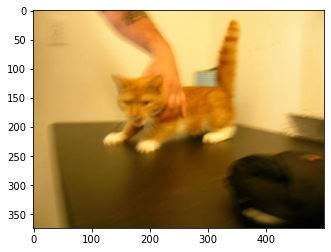

In [16]:
train_cat_fnames = os.listdir(train_cats_dir)
img_path = os.path.join(train_cats_dir, train_cat_fnames[0]) 
img = mpimg.imread(img_path)
plt.imshow(img)

In [14]:
type(img), img.shape, img[0,0,:], img.max()  # 8-bits

(numpy.ndarray, (375, 499, 3), array([191, 190,  97], dtype=uint8), 255)

### 간단한 CNN을 사용한 모델


In [17]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np 

keras에서는 이미지데이터 학습을 쉽게하도록 하기위해 다양한 패키지를 제공한다. 그 중 하나가 ImageDataGenerator 클래스이다. ImageDataGenerator 클래스를 통해 객체를 생성할 때 파라미터를 전달해주는 것을 통해 데이터의 전처리를 쉽게할 수 있고, 또 이 객체의 
flow_from_directory 메소드를 활용하면 폴더 형태로된 데이터 구조를 바로 가져와서 사용할 수 있다. 이 과정은 매우 직관적이고 코드도 ImageDataGenerator를 사용하지 않는 방법에 비해 상당히 짧아진다.

출처: https://3months.tistory.com/199 [Deep Play]

#### ImageDataGenerator() object
- Generate batches of tensor image data with real-time data augmentation. The data 
  will be looped over (in batches).
- flow_from_dataframe() method: Takes the dataframe and the path to a directory and 
    generates batches of augmented/normalized data.
- flow_from_directory() method: Takes the path to a directory & generates batches of 
    augmented data.

In [18]:
img_width = 150
img_height = 150

datagen = ImageDataGenerator(rescale = 1./255)
train_generator = datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)

validation_generator = datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)
# generate model
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
______________________________________

In [19]:
# for exercise (just for checking) - it will loop forever, so you need break !
for data_batch, labels_batch in train_generator:
    print(data_batch.shape, labels_batch.shape)
    break

(20, 150, 150, 3) (20,)


- .fit은 전체 학습 데이터 세트가 메모리에 맞고 데이터 증가가 적용되지 않을 때 사용됩니다.
- .fit_generator는 메모리에 맞출 거대한 데이터 세트가 있거나 데이터 증가를 적용해야 할 때 사용됩니다.

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Use ImageDataGenerator
history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

C:\Users\wjsdu\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
C:\Users\wjsdu\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 13s 76ms/step - loss: 0.6881 - acc: 0.5485 - val_loss: 0.6683 - val_acc: 0.5690
Epoch 2/10
100/100 [==============================] - 7s 67ms/step - loss: 0.6487 - acc: 0.6345 - val_loss: 0.6240 - val_acc: 0.6680
Epoch 3/10
100/100 [==============================] - 7s 66ms/step - loss: 0.5991 - acc: 0.6850 - val_loss: 0.6043 - val_acc: 0.6730
Epoch 4/10
100/100 [==============================] - 7s 66ms/step - loss: 0.5618 - acc: 0.7085 - val_loss: 0.5775 - val_acc: 0.6990
Epoch 5/10
100/100 [==============================] - 7s 66ms/step - loss: 0.5338 - acc: 0.7345 - val_loss: 0.5597 - val_acc: 0.7100
Epoch 6/10
100/100 [==============================] - 7s 66ms/step - loss: 0.5093 - acc: 0.7485 - val_loss: 0.5542 - val_acc: 0.7170
Epoch 7/10
100/100 [==============================] - 7s 66ms/step - loss: 0.4896 - acc: 0.7675 - val_loss: 0.6622 - val_acc: 0.6610
Epoch 8/10
100/100 [==============================] - 7s 67ms/step -

In [21]:
model.save('./sample_data/cats_and_dogs_from_lab60.h5')  # will be used later in this code
# or tf.keras.models.save_model()
model = keras.models.load_model('./sample_data/cats_and_dogs_from_lab60.h5')

- there are two types for saving the models
  - tensorflow SavedModel (recommended)(default for model.save())
  - keras H5 (파일명을 '.h5' 로 주거나 parameter format='h5') 

In [20]:
# from google.colab import drive
# drive.mount('/content/drive')

#### When we call the .fit() function it makes assumptions:

- The entire training set can fit into the Random Access Memory (RAM) of the computer.
- Calling the model .fit method for a second time is not going to reinitialize our 
  already trained weights, which means we can actually make consecutive calls to fit 
  if we want to and then manage it properly.
- There is no need for using the Keras generators(i.e no data argumentation)
- Raw data is itself used for training our network and our raw data will only fit 
  into the memory.

#### When we call the .fit_generator() function it makes assumptions:

- generator 함수를 사용해야 함.
- Keras is first calling the generator function(dataAugmentaion)
- Generator function(dataAugmentaion) provides a batch_size of 32 to our .fit_generator() function.
- our .fit_generator() function first accepts a batch of the dataset, then performs 
  backpropagation on it, and then updates the weights in our model.
- For the number of epochs specified(10 in our case) the process is repeated.
- returns a History object. Its History.history attribute is a record of training 
  loss values and metrics values at successive epochs, as well as validation loss 
  values and validation metrics values (if applicable).

### 성능 확인

Text(0.5, 1.0, 'Training(--) and validation loss')

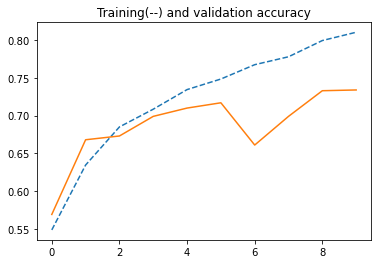

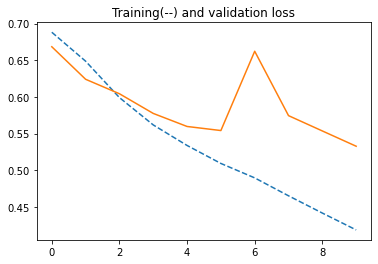

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')


## data augmentation과 드롭아웃 사용

- 드롭 아웃 계층은 훈련 시간 동안 각 단계의 rate 를 사용하여 입력 단위를 무작위로 0으로 설정하여 ovefitting 을 방지.
- 0 으로 설정되지 않은 입력은 모든 입력에 대한 합계가 변경되지 않도록 1 / (1-rate)만큼 scaled up.
- training 할 때만 적용되고 inference 할 때에는 drop 되지 않음.

In [23]:
# Augmentation
train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
# 											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
# 											   classes=['dogs','cats'],
											   class_mode='binary',
											   batch_size=20)


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### augmented 된 훈련 이미지는 마지막 셀에서 보세요...^^

In [24]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

history = model.fit_generator(
    generator=train_generator, 
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 14s 137ms/step - loss: 0.6924 - acc: 0.5175 - val_loss: 0.6876 - val_acc: 0.5140
Epoch 2/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6842 - acc: 0.5510 - val_loss: 0.6852 - val_acc: 0.5160
Epoch 3/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6741 - acc: 0.5800 - val_loss: 0.6411 - val_acc: 0.6480
Epoch 4/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6693 - acc: 0.5805 - val_loss: 0.6298 - val_acc: 0.6630
Epoch 5/30
100/100 [==============================] - 13s 132ms/step - loss: 0.6535 - acc: 0.6225 - val_loss: 0.6173 - val_acc: 0.6620
Epoch 6/30
100/100 [==============================] - 13s 134ms/step - loss: 0.6464 - acc: 0.6090 - val_loss: 0.5935 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 13s 133ms/step - loss: 0.6284 - acc: 0.6475 - val_loss: 0.5977 - val_acc: 0.6610
Epoch 8/30
100/100 [==============================] - 1

Text(0.5, 1.0, 'Training(--) and validation loss')

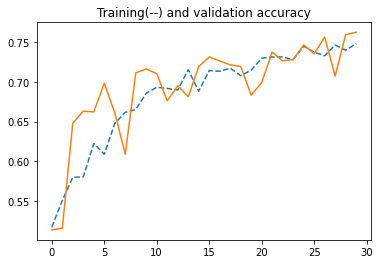

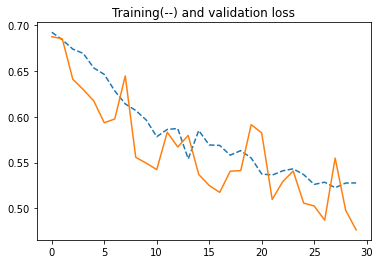

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

- 데이터 증식과 드롭아웃 덕택에 더이상 과대적합되지 않음을 볼 수 있다.

## Random 하게 데이터 증식한 훈련 이미지 그리기 (from the Keras book)


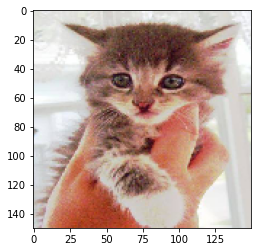

In [26]:
from keras.preprocessing import image   # 이미지 전처리 유틸리티 모듈

fnames = sorted([os.path.join(train_cats_dir, fname) for 
                fname in os.listdir(train_cats_dir)])
img_path = fnames[3]  # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150)) # 이미지를 읽고 크기 변경

plt.imshow(img)

In [27]:
train_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True)

In [28]:
# ImageDataGenerator.flow(): Takes data & label arrays, generates batches of augmented data.
# 배치 데이터를 기대하기 떄문에 샘플 데이터에 배치 차원을 추가하여 4-d 텐서로 만듬.

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)    # (1,150,150,3) 크기로 변환
print(x.shape)

(1, 150, 150, 3)


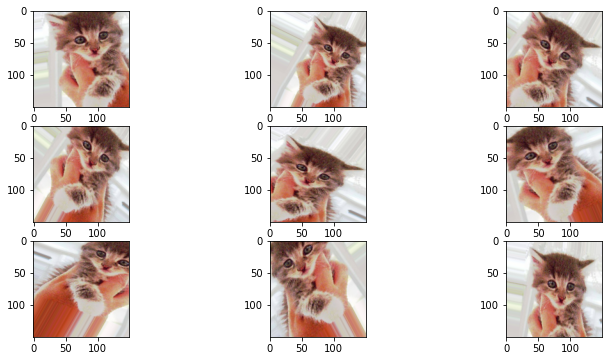

In [29]:
i = 0
plt.figure(figsize=(12,6))
for batch in train_datagen.flow(x, batch_size=1):   # endless loop (need break)
    plt.subplot(3,3,i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i +=1
    if i % 9 == 0:
        break
plt.show()